# Tutorial for Acquiring Waveform Data



Python libraries containing classes and functions are imported into either a python script or jupyter notebook. These libraries are ususally defined at the beginning of the document, with functions used throughout the document.

The obspy library used here contains several classes and functions used for acquiring and processing seismological data.

In [4]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client 

Define variables used to download waveform data:

In [5]:
# Time
start_time = "2020-07-22 06:12:00"
time_length = 30  # time in minutes after the start time

# Station information
CLIENT = "IRIS"
NETWORK = "IU"
STATION = "COLA"
LOC_CODE = "00"
CHANNEL = "LHZ"


Other stations on the network can be found here:  http://www.fdsn.org/networks/detail/IU/

In [57]:
# Sets the date time to the format used by obspy
start = UTCDateTime(start_time)
end= start + time_length * 60

client = Client(CLIENT)

st = client.get_waveforms(NETWORK, STATION, LOC_CODE, CHANNEL, start, end, attach_response=True)

print(st)

1 Trace(s) in Stream:
IU.COLA.00.LHZ | 2020-07-22T06:12:00.069539Z - 2020-07-22T06:41:59.069539Z | 1.0 Hz, 1800 samples


The cell above has downloaded waveform data from the COLA seismometer from the IU network, as determined in the defined variables.

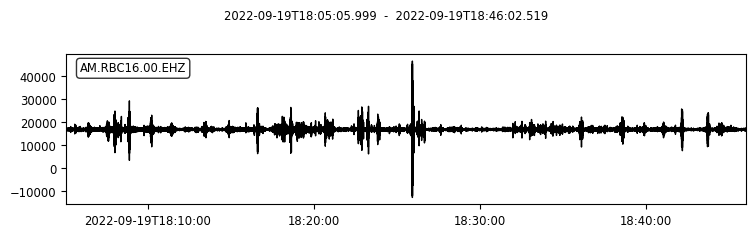

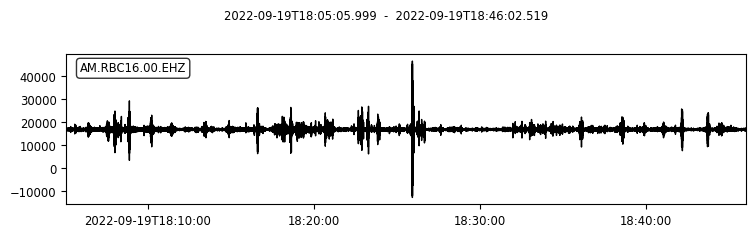

In [78]:
# Plot the downloaded waveform
tr = st[0]
tr.plot()

The waveform above is the data from the seismometer with the y-axis measuring counts from the geophone. These counts can be converted into displacement by removing the instrument response.

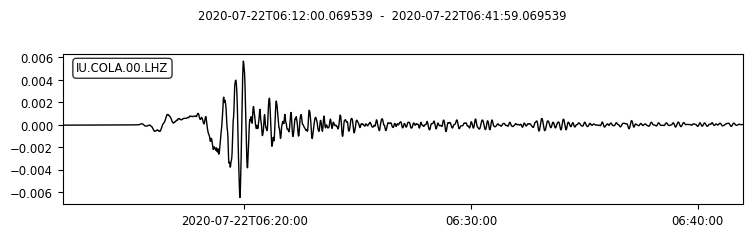

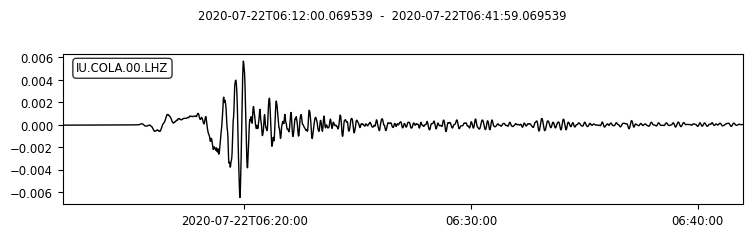

In [55]:
    # Pre filtering to avoid problems during the deconvolution
pre_filt = (0.0001, 0.0005, 0.90, 0.91)

tr = tr.remove_response(pre_filt=pre_filt, output='DISP')

tr.plot()

This waveform can be filtered using bandpass filters to show stronger earthquakes in the seismic waveform.

Below is an example of how filtering can be used to show a detected Seismic wave in a noisy section.

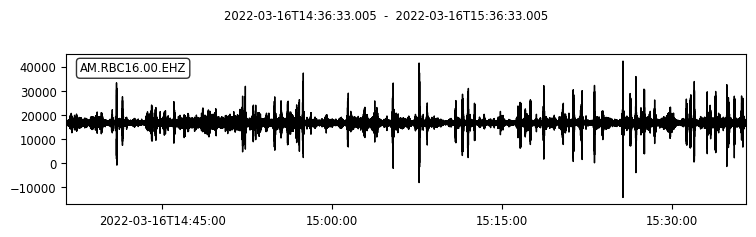

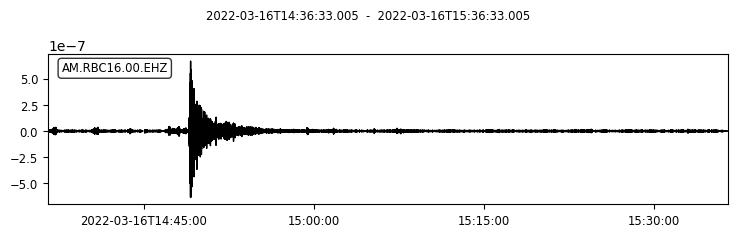

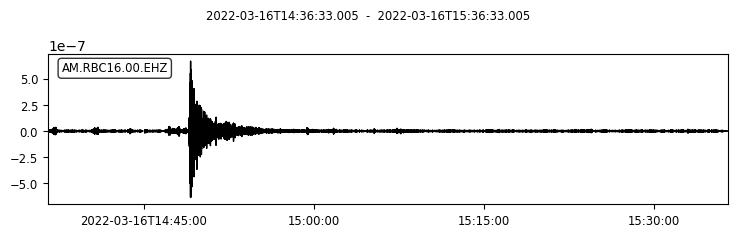

In [77]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client 

# Variables


start_time="2022-03-16 14:36:33"
time_length = 60  # time in minutes after the start time

    # Station Information
STATION = "RBC16"
NETWORK= 'AM'
LOC_CODE = '00'
CHANNEL = 'EHZ'
CLIENT = "RASPISHAKE"

# Filtering the waveform
pre_filt=(0.001, 0.002, 45.0, 50.0)
low_filt= 1.0
high_filt= 2.0


start = UTCDateTime(start_time)
end= start + time_length * 60

client = Client(CLIENT)

st_0 = client.get_waveforms(NETWORK, STATION, LOC_CODE, CHANNEL, start, end, attach_response=True)

st_1 = client.get_waveforms(NETWORK, STATION, LOC_CODE, CHANNEL, start, end, attach_response=True)

st_1.remove_response(pre_filt=pre_filt, output='DISP')
st_1.filter('bandpass', freqmin=low_filt, freqmax=high_filt, corners=2, zerophase=True)

st_0.plot() # Just the raw counts of the instrument
st_1.plot() # Filtered instrument
